In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Sex:
- 0 - Female
- 1 - Male

Embarked:
	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

os.chdir(r'C:\Users\kclark1\Desktop\Titanic ML Project')

titanic_train = pd.read_csv('train.csv')

titanic_test = pd.read_csv('test.csv')

mean_age = round((titanic_train.Age.mean()),1)

titanic_train['Age'] = titanic_train.Age.fillna(mean_age)

titanic_train = titanic_train.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

titanic_train['Sex'] = titanic_train['Sex'].astype('category')

titanic_train['Sex'] = titanic_train.Sex.cat.codes

embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

titanic_train = pd.concat([titanic_train, embarked], axis=1)

titanic_train.drop('Embarked',inplace=True,axis=1)

mean_age = round((titanic_test.Age.mean()),1)

titanic_test['Age'] = titanic_test.Age.fillna(mean_age)

mean_fare = round(titanic_test.Fare.mean(),4)

titanic_test['Fare'] = titanic_test.Fare.fillna(mean_fare)

titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

titanic_test['Sex'] = titanic_test.Sex.astype('category')

titanic_test['Sex'] = titanic_test.Sex.cat.codes

embarked_test = pd.get_dummies(titanic_test['Embarked'],drop_first=True)

titanic_test = pd.concat([titanic_test, embarked_test],axis=1)

titanic_test = titanic_test.drop('Embarked',axis=1)

y = titanic_train.Survived.values

X = titanic_train.drop('Survived',axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.3)

c = [0.001,0.01,1,10,100,1000]

for i in c:
    log_model = LogisticRegression(C=i,random_state=101)
    log_model.fit(X_train,y_train)
    print(f'C = {i} \n Accuracy: {round(log_model.score(X_test,y_test) *100)}')

log_model = LogisticRegression(C=10)

log_model.fit(X_train,y_train)

preds = log_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

from sklearn.ensemble import RandomForestClassifier
leafs = [10,20,30,40,50,60,70,80,90,100]
estimators = [60,70,80,90,100,150,180,200]
for l in leafs:
    for e in estimators:
        ran_forest = RandomForestClassifier(n_estimators=e, max_leaf_nodes=l,random_state=101)
        ran_forest.fit(X_train,y_train)
        print(f'Estimators: {e}\nMax Leaf Nodes: {l}\nAccuracy:{round(ran_forest.score(X_test, y_test),3)*100}')

ran_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=80,random_state=101)
ran_forest.fit(X_train,y_train)
preds = ran_forest.predict(X_test)
print(confusion_matrix(y_test,preds),'/n',classification_report(y_test,preds))

'''X_train = titanic_train.drop('Survived',axis=1).values
y_train =  titanic_train.Survived.values
X_test = titanic_test.values
ran_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=80,random_state=101)
ran_forest.fit(X_train,y_train)
preds = ran_forest.predict(X_test)'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C = 0.001 
 Accuracy: 66.0
C = 0.01 
 Accuracy: 68.0
C = 1 
 Accuracy: 78.0
C = 10 
 Accuracy: 78.0
C = 100 
 Accuracy: 79.0
C = 1000 
 Accuracy: 79.0
[[135  19]
 [ 39  75]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

Estimators: 60
Max Leaf Nodes: 10
Accuracy:80.2
Estimators: 70
Max Leaf Nodes: 10
Accuracy:79.9
Estimators: 80
Max Leaf Nodes: 10
Accuracy:81.0
Estimators: 90
Max Leaf Nodes: 10
Accuracy:80.60000000000001
Estimators: 100
Max Leaf Nodes: 10
Accuracy:80.60000000000001
Estimators: 150
Max Leaf Nodes: 10
Accuracy:81.0
Estimators: 180
Max Leaf Nodes: 10
Accuracy:81.3
Estimators: 200
Max Leaf Nodes: 10
Accuracy:81.0
Estimators: 60
Max Leaf Nodes: 20
Accuracy:80.2
Estimators: 70
Max Leaf Nodes: 20
Acc

"X_train = titanic_train.drop('Survived',axis=1).values\ny_train =  titanic_train.Survived.values\nX_test = titanic_test.values\nran_forest = RandomForestClassifier(n_estimators=200, max_leaf_nodes=80,random_state=101)\nran_forest.fit(X_train,y_train)\npreds = ran_forest.predict(X_test)"

In [3]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [ ]:
el = {}
leafs = [10,20,30,40,50,60,70,80,90,100]
estimators = [60,70,80,90,100,150,180,200]
for l in leafs:
    for e in estimators:
        for x in range(0,8):
            ran_forest = RandomForestClassifier(n_estimators=e, max_leaf_nodes=l,random_state=101)
            ran_forest.fit(X_train,y_train)
            el.update({str(e):l})
            el.update({str(x):{ran_forest.score(X_test,y_test)}})

In [ ]:
el

In [36]:
survived = pd.DataFrame(data=preds,index=titanic_test.PassengerId,columns=['Survived']).reset_index()

In [37]:
survived.to_csv('Survived',index=False)

In [75]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Sex       418 non-null int8
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), int8(1), uint8(2)
memory usage: 17.6 KB


In [76]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), int8(1), uint8(2)
memory usage: 44.5 KB


In [26]:
sns.set_style('whitegrid')

In [ ]:
sns.pairplot(titanic_train)

([<matplotlib.axis.XTick at 0x147788e4898>,
 <a list of 2 Text xticklabel objects>)

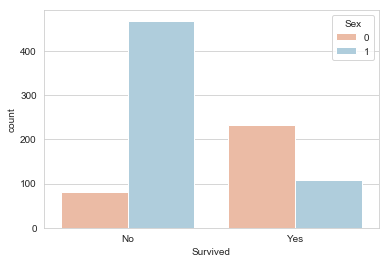

In [95]:
plt.figure()
sns.countplot(x = 'Survived', data=titanic_train, hue='Sex',palette='RdBu')
plt.xticks([0,1],['No','Yes'])